In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import plotly.express as px
import altair as alt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
def custom_accuracy(y_test, y_pred, thresold):
    correct = 0
    total = len(y_pred)
    for i in range(0,total):
        if(abs(y_pred[i]-y_test.to_numpy()[i]) <= thresold):
            correct += 1
    return ((correct/total)*100)

In [ ]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [ ]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [ ]:
matches[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
matches['city'] = matches['city'].fillna('Dubai')

In [ ]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['toss_winner'] = matches['toss_winnerm'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

In [ ]:
matches = matches[matches['winner'].notnull()]

In [ ]:
matches.drop('umpire3', axis = 1, inplace = True)

In [ ]:
enc = LabelEncoder()

matches["city"] = enc.fit_transform(matches["city"])
matches["team1"] = enc.fit_transform(matches["team1"])
matches["team2"] = enc.fit_transform(matches["team2"])
matches["toss_winner"] = enc.fit_transform(matches["toss_winner"])
matches["toss_decision"] = enc.fit_transform(matches["toss_decision"])
matches["winner"] = enc.fit_transform(matches["winner"])
matches["venue"] = enc.fit_transform(matches["venue"])

In [ ]:
matplotlib.rcParams['figure.figsize'] = (14, 8)

In [ ]:
wins_per_season = matches.groupby('season')['winner'].value_counts()
wins_per_season_df = pd.DataFrame(columns = ['year', 'team', 'wins'])
year = 2008

In [ ]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')

CH Gayle  : has most man of the match awards


In [ ]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 1    79.722704
0    50.606586
Name: toss_decision, dtype: float64


In [ ]:
for item in wins_per_season.iteritems():
  if (item[0][0] == year):
    win_series = pd.DataFrame({  
        'year' : [item[0][0]],
        'team' : [item[0][1]],
        'wins' : [item[1]]
    })
    wins_per_season_df = wins_per_season_df.append(win_series)
    year += 1

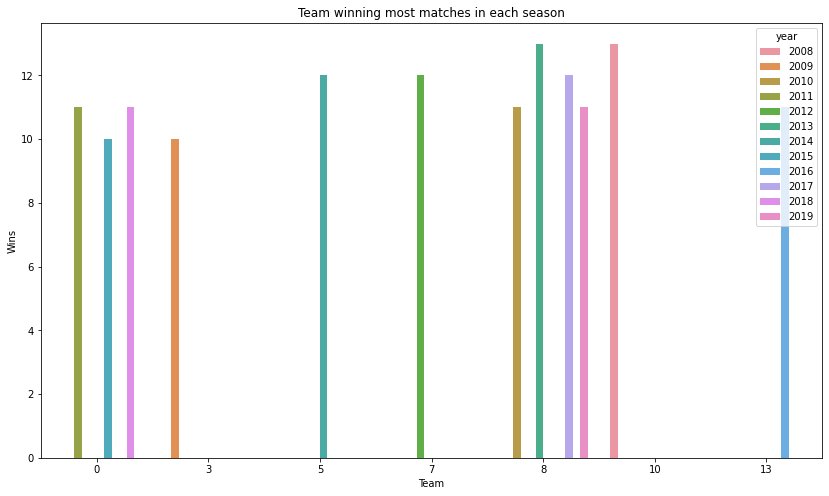

In [ ]:
sb.barplot(x='team', y='wins', hue='year', data=wins_per_season_df)
plt.title('Team winning most matches in each season')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()

In [ ]:
matches_at_venue = matches['venue'].value_counts()
matches_at_venue_df = pd.DataFrame(columns=['venue', 'matches'])
for item in matches_at_venue.iteritems():
  match_df = pd.DataFrame({
      'venue' : [item[0]],
      'matches' : [item[1]]
  })
  matches_at_venue_df = matches_at_venue_df.append(match_df, ignore_index = True)

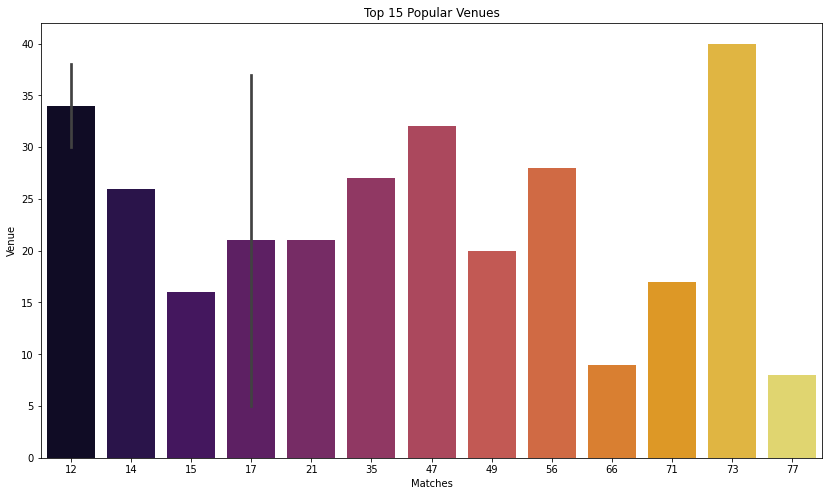

In [ ]:
sb.barplot(x='matches', y='venue', data=matches_at_venue_df.iloc[np.arange(0,15),:], palette='inferno')
plt.title('Top 15 Popular Venues')
plt.xlabel('Matches')
plt.ylabel('Venue')
plt.show()

In [ ]:
team_wins = matches['winner'].value_counts()
team_wins_df = pd.DataFrame(columns = ['team', 'wins'])
for item in team_wins.iteritems():
  temp_win_df = pd.DataFrame({
      'team' : [item[0]],
      'wins' : [item[1]]
  })
  team_wins_df = team_wins_df.append(temp_win_df, ignore_index = True)

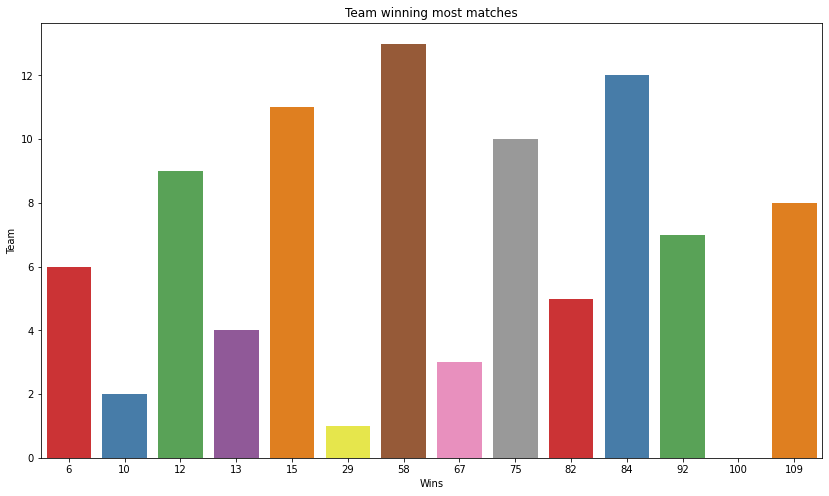

In [ ]:
sb.barplot(x='wins', y='team', data=team_wins_df, palette='Set1')
plt.title('Team winning most matches')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

In [ ]:
team_winper = (matches['winner'].value_counts() / (matches['team1'].value_counts() + matches['team2'].value_counts()) * 100).sort_values(ascending=False)
team_winper_df = pd.DataFrame(columns=['team', 'win percent'])
for item in team_winper.iteritems():
  temp_winper_df = pd.DataFrame({
      'team' : [item[0]],
      'win percent' : [item[1]]
  })
  team_winper_df = team_winper_df.append(temp_winper_df, ignore_index = True)

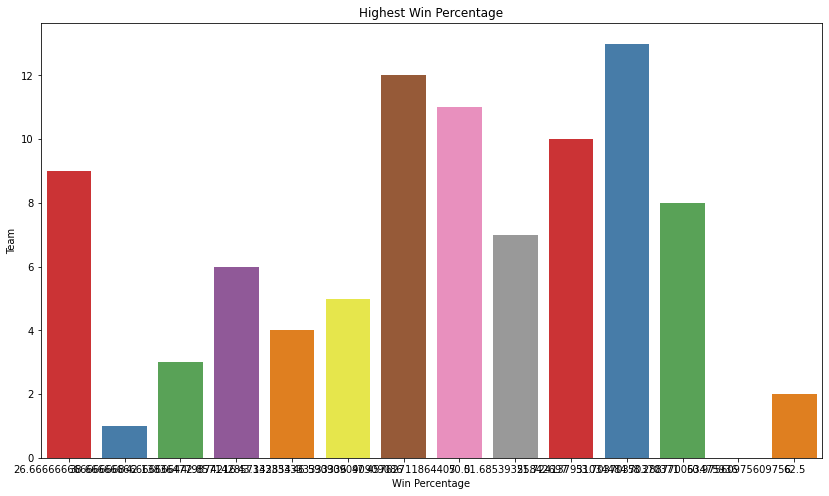

In [ ]:
sb.barplot(x='win percent', y='team', data=team_winper_df, palette='Set1')
plt.title('Highest Win Percentage')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.show()

In [ ]:
potm_award = matches['player_of_match'].value_counts()
potm_award_df = pd.DataFrame(columns = ['player', 'awards'])
i=0
for item in potm_award.iteritems():
  if i>=15:
    break
  else:
    temp_potm = pd.DataFrame({
        'player' : [item[0]],
        'awards' : [item[1]]
    })
    potm_award_df = potm_award_df.append(temp_potm, ignore_index=True)
    i += 1

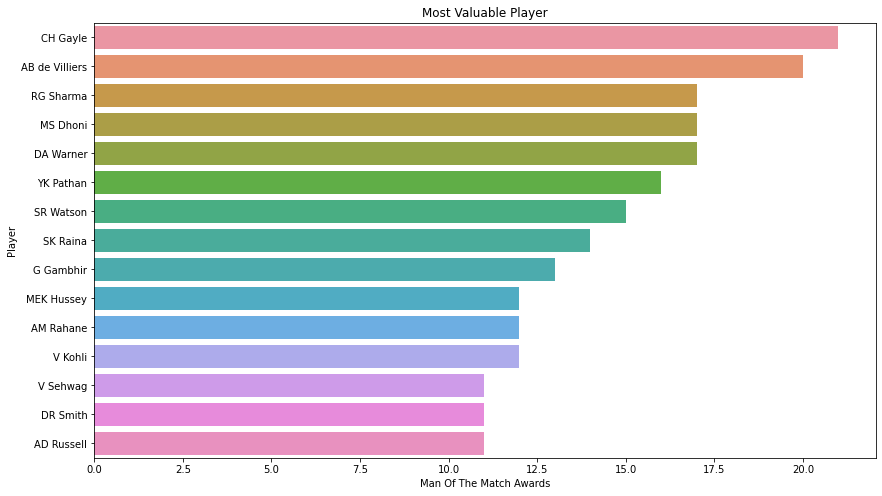

In [ ]:
sb.barplot(x='awards', y='player', data=potm_award_df)
plt.title('Most Valuable Player')
plt.xlabel('Man Of The Match Awards')
plt.ylabel('Player')
plt.show()

In [ ]:
toss_wins = matches['toss_winner'].value_counts()
toss_wins_df = pd.DataFrame(columns = ['team', 'toss wins'])
for item in toss_wins.iteritems():
  temp_toss_win_df = pd.DataFrame({
      'team' : [item[0]],
      'toss wins' : [item[1]]
  })
  toss_wins_df = toss_wins_df.append(temp_toss_win_df, ignore_index = True)

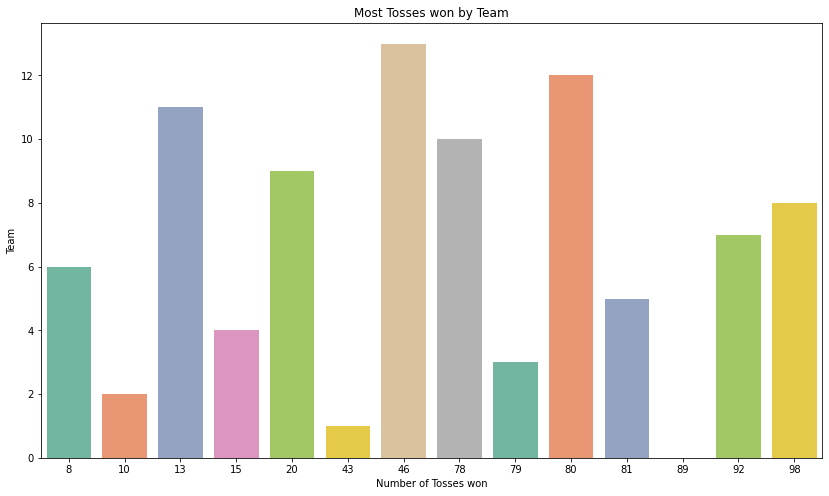

In [ ]:
sb.barplot(x='toss wins', y='team', data=toss_wins_df, palette='Set2')
plt.title('Most Tosses won by Team')
plt.xlabel('Number of Tosses won')
plt.ylabel('Team')
plt.show()

In [ ]:
x = matches.iloc[:,[2,4,5,6,7,14]]
y = matches.iloc[:,10]

In [ ]:
pd.options.mode.chained_assignment = None  # To remove warning

x.loc[matches['winner']==matches['team1'],'team1_win'] = 1
x.loc[matches['winner']!=matches['team1'],'team1_win'] = 0

x.loc[matches['toss_winner']==matches['team1'],'team1_toss_win'] = 1
x.loc[matches['toss_winner']!=matches['team1'],'team1_toss_win'] = 0

x.loc[((matches['toss_winner']==matches['team1']) & (matches['toss_decision']=='bat')),'team1_bat'] = 1
x.loc[((matches['toss_winner']==matches['team2']) & (matches['toss_decision']=='field')),'team1_bat'] = 1

In [ ]:
display(x['team1_win'].value_counts())
display(x['team1_toss_win'].value_counts())
display(x['team1_bat'].value_counts())

0.0    417
1.0    335
Name: team1_win, dtype: int64

0.0    460
1.0    292
Name: team1_toss_win, dtype: int64

Series([], Name: team1_bat, dtype: int64)

In [ ]:
x.drop('team1_bat', axis=1, inplace=True)

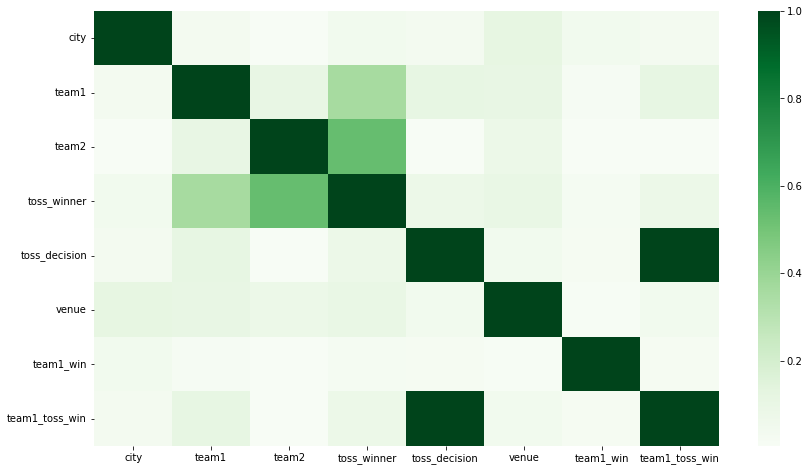

In [ ]:
sb.heatmap(abs(x.corr()), cmap='Greens')
plt.show()

In [ ]:
x.drop('team1_toss_win', axis=1, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6, shuffle=True)
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (526, 7)
Shape of x_test : (226, 7)
Shape of y_train : (526,)
Shape of y_test : (226,)


In [ ]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
param_grid1 = {
    'n_estimators' : np.arange(100,401,50),
    'max_depth' : np.arange(5,31,5)
}
gs_rfc = GridSearchCV(RandomForestClassifier(), param_grid1, cv=4)
gs_rfc.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400])})

In [ ]:
gs_rfc.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [ ]:
RFC = RandomForestClassifier(n_estimators = gs_rfc.best_params_['n_estimators'], max_depth = gs_rfc.best_params_['max_depth'])
RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=150)

In [ ]:
pred1 = RFC.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred1)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred1, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred1, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred1, average="weighted")*100,2)}%')

Accuracy : 75.42%
Precision : 75.88%
Recall : 75.42%
F1 Score : 75.29%


In [ ]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
param_grid2 = {
    'splitter' : ['best', 'random'],
    'max_depth' : np.arange(5,31,5),
    'random_state' : np.arange(1,30,4)
}
gs_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid2, cv=4)
gs_dtc.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                         'random_state': array([ 1,  5,  9, 13, 17, 21, 25, 29]),
                         'splitter': ['best', 'random']})

In [ ]:
gs_dtc.best_params_

{'max_depth': 15, 'random_state': 29, 'splitter': 'random'}

In [ ]:
DTC = DecisionTreeClassifier(splitter = gs_dtc.best_params_['splitter'],
                             max_depth = gs_dtc.best_params_['max_depth'],
                             random_state = gs_dtc.best_params_['random_state'])
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=29, splitter='random')

In [ ]:
pred2 = DTC.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred2)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred2, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred2, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred2, average="weighted")*100,2)}%')

Accuracy : 96.35%
Precision : 96.6%
Recall : 96.35%
F1 Score : 96.37%


In [ ]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
param_grid3 = {
    'decision_function_shape' : ['ovo', 'ovr'],
    'degree' : np.arange(3,6),
    'random_state' : np.arange(1,30,4)
}
gs_svc = GridSearchCV(SVC(), param_grid3, cv=4)
gs_svc.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': array([3, 4, 5]),
                         'random_state': array([ 1,  5,  9, 13, 17, 21, 25, 29])})

In [ ]:
svc = SVC(decision_function_shape = gs_svc.best_params_['decision_function_shape'],
          degree = gs_svc.best_params_['degree'],
          random_state = gs_svc.best_params_['random_state'])
svc.fit(x_train, y_train)

SVC(decision_function_shape='ovo', random_state=1)

In [ ]:
gs_svc.best_params_svc = SVC(decision_function_shape = gs_svc.best_params_['decision_function_shape'],
          degree = gs_svc.best_params_['degree'],
          random_state = gs_svc.best_params_['random_state'])
svc.fit(x_train, y_train)

SVC(decision_function_shape='ovo', random_state=1)

In [ ]:
pred3 = svc.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred3)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred3, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred3, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred3, average="weighted")*100,2)}%')

Accuracy : 40.27%
Precision : 38.15%
Recall : 40.27%
F1 Score : 37.3%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
